In [11]:
import torch as tch
from torch import autograd

In [8]:
a1 = tch.Tensor(6,6)
print(a1)


-1.1848e-26  4.5723e-41 -1.1848e-26  4.5723e-41  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  1.6255e-43  1.1351e-43  0.0000e+00 -1.1848e-26  4.5723e-41
-9.3544e+23  3.0644e-41 -9.6731e+23  3.0644e-41  6.8664e-44  0.0000e+00
[torch.FloatTensor of size 6x6]



In [9]:
a2 = tch.rand(6,6)
print(a2)


 0.5872  0.0279  0.2313  0.7905  0.6577  0.2489
 0.2529  0.5860  0.6877  0.0157  0.0138  0.8735
 0.3973  0.4544  0.8631  0.1011  0.8682  0.9558
 0.8635  0.8142  0.7106  0.5953  0.2627  0.2349
 0.5930  0.7063  0.4601  0.6565  0.9937  0.9896
 0.0301  0.0464  0.7377  0.4010  0.6787  0.2290
[torch.FloatTensor of size 6x6]



In [10]:
a1+a2


 5.8718e-01  2.7909e-02  2.3126e-01  7.9054e-01  6.5769e-01  2.4894e-01
 2.5286e-01  5.8600e-01  6.8771e-01  1.5668e-02  1.3766e-02  8.7353e-01
 3.9733e-01  4.5444e-01  8.6311e-01  1.0108e-01  8.6817e-01  9.5584e-01
 8.6352e-01  8.1424e-01  7.1055e-01  5.9526e-01  2.6272e-01  2.3491e-01
 5.9304e-01  7.0627e-01  4.6010e-01  6.5651e-01  9.9366e-01  9.8962e-01
-9.3544e+23  4.6384e-02 -9.6731e+23  4.0097e-01  6.7866e-01  2.2904e-01
[torch.FloatTensor of size 6x6]

In [13]:
m = tch.nn.Linear(20, 30)
input = autograd.Variable(torch.randn(128, 20))
output = m(input)
print(output.size())


torch.Size([128, 30])


In [31]:
import torch
from torch import autograd as agd
import torch.nn as tchnn
import torch.nn.functional as F
import torch.optim as optm

In [26]:
class LeNet5(tchnn.Module):
    
    def __init__(self):
        super(LeNet5, self).__init__()
        self.C1 = tchnn.Conv2d(1,6,5) #in-channel, out-channel, kernel-size
        self.C3 = tchnn.Conv2d(6,16,5)
        self.C5 = tchnn.Conv2d(16,120,5)
        self.F6 = tchnn.Linear(120,84)
        self.Ou = tchnn.Linear(84,10)
        self.LossF = tchnn.CrossEntropyLoss()
    
    def forward(self, x, target):
        x = F.max_pool2d(F.relu(self.C1(x)), 2) #till S2
        x = F.max_pool2d(F.relu(self.C3(x)), 2) #till S4
        x = F.relu(self.C5(x)) #till C5
        x = F.relu(self.F6(x))
        x = F.relu(self.Ou(x))
        loss = self.LossF(x, target)
        return x,loss
        
    def name(self):
        return 'LeNet5'

In [27]:
model = LeNet5().cuda()

In [30]:
print(model)

LeNet5 (
  (C1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (C3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (C5): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (F6): Linear (120 -> 84)
  (Ou): Linear (84 -> 10)
  (LossF): CrossEntropyLoss (
  )
)


In [33]:
optimizer = optm.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [61]:
#loading data
import os
import struct
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def read(dataset = "training", path = "."):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte')
    else:
        print("dataset must be 'testing' or 'training'")

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    get_img = lambda idx: (lbl[idx], img[idx])

    # Create an iterator which returns each image in turn
    for i in range(len(lbl)):
        yield get_img(i)

In [70]:
train_data = list(read(dataset='training', path='./MNIST_data'))
test_data = list(read(dataset='testing', path='./MNIST_data'))
#making data 32X32
train_data32 = []
test_data32 = []
for x in train_data:
    img = np.zeros([32,32])
    img[2:30,2:30] = x[1]
    train_data32.append((x[0],img))

In [72]:
train_data32[0][1].shape

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

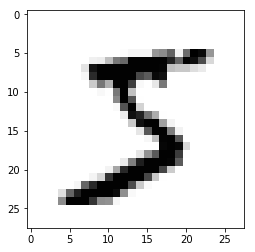

In [62]:
plt.imshow(train_data[0][1], cmap=mpl.cm.Greys)
plt.show()

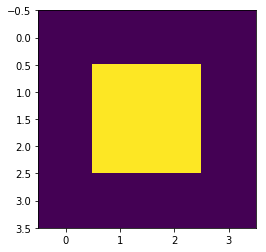

In [69]:
a = np.zeros([4,4])
a[1:3,1:3] = np.ones([2,2])
plt.imshow(a)
plt.show()